In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [368]:
df1 = pd.read_csv('athlete_events.csv', index_col='ID')
df2 = pd.read_csv('noc_regions.csv')
df1.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [369]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [370]:
df = pd.merge(df1, df2, on='NOC', how='left')
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Columns

1. Name - Athlete's name
2. Sex - M or F
3. Age - Integer
4. Height - In centimeters
5. Weight - In kilograms
6. Team - Team name
7. NOC - National Olympic Committee 3-letter code
8. Games - Year and season
9. Year - Integer
10. Season - Summer or Winter
11. City - Host city
12. Sport - Sport
13. Event - Event
14. Medal - Gold, Silver, Bronze, or NA

## Key Questions

- **What is the distribution of medals by country over the years?**

  This question helps identify the most successful countries in the Olympic Games.

- **How has the participation of women in the Olympic Games evolved over the years?**

  An analysis of the change in female participation can reveal important trends in gender equality in sports.

- **What is the relationship between the height and weight of athletes by sport?**

  This could provide insights into common physical characteristics of athletes in different disciplines.

- **How does the age of medalists vary across different sports and events?**

  This question helps understand in which sports athletes tend to achieve success at different ages.

- **How has the distribution of sports in the Olympic Games changed over time?**

  Identifying trends in the inclusion of new sports or the elimination of others could be relevant for planning future Games.

- **Are there significant differences in the number of medals won by male and female athletes?**

  An analysis of this type could help highlight advances or disparities in competition by gender.

- **Which countries have emerged in recent Olympic Games in terms of medals won?**

  Identifying countries with significant improvements could be useful for understanding global trends in sports.

- **What is the success rate (medals won) of athletes based on the number of Olympic Games they have participated in?**

  This could provide insight into the experience and longevity in the careers of successful athletes.


In [371]:
df.shape

(271116, 16)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
 14  region  270746 non-null  object 
 15  notes   5039 non-null    object 
dtypes: float64(3), int64(1), object(12)
memory usage: 33.1+ MB


In [373]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [374]:

df[df.region.isnull()].groupby(['Team', 'NOC']).size()

Team                      NOC
June Climene              SGP      3
Refugee Olympic Athletes  ROT     12
Rika II                   SGP      4
Singapore                 SGP    338
Singapore-1               SGP      2
Singapore-2               SGP      2
Tuvalu                    TUV      7
Unknown                   UNK      2
dtype: int64

In [375]:
df2[df2.region == 'Singapore']

,NOC,region,notes
178,SIN,Singapore,NaN


In [376]:
df[df.NOC == 'SIN']


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


In [377]:
df['region'] = df.apply(lambda x: 'Singapore' if x.NOC == 'SGP' else x.region, axis = 1)

In [378]:
df[df.NOC == 'SGP']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
578,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,Singapore,NaN
579,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,Singapore,NaN
2719,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,Singapore,NaN
7659,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,Singapore,NaN
7660,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,Singapore,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268752,Zhang Guirong,F,26.0,182.0,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NaN,Singapore,NaN
268753,Zhang Guirong,F,30.0,182.0,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NaN,Singapore,NaN
268993,Zhang Xueling,F,21.0,163.0,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NaN,Singapore,NaN
268994,Zhang Xueling,F,21.0,163.0,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NaN,Singapore,NaN


In [379]:
df[df.NOC == 'TUV']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
64674,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN,NaN,Tuvalu
132436,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN,NaN,Tuvalu
148612,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN,NaN,Tuvalu
148613,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN,NaN,Tuvalu
172492,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN,NaN,Tuvalu
240317,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN,NaN,Tuvalu
240342,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN,NaN,Tuvalu


In [380]:
df['region'] = df.apply(lambda row: row['notes'] if pd.isna(row['region']) and row['notes'] == 'Tuvalu' else row['region'], axis=1)
df[df.NOC == 'TUV']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
64674,Logona Esau,M,21.0,163.0,69.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN,Tuvalu,Tuvalu
132436,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Featherweight,NaN,Tuvalu,Tuvalu
148612,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's 100 metres,NaN,Tuvalu,Tuvalu
148613,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 100 metres,NaN,Tuvalu,Tuvalu
172492,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,TUV,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,NaN,Tuvalu,Tuvalu
240317,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,TUV,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,NaN,Tuvalu,Tuvalu
240342,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,TUV,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,NaN,Tuvalu,Tuvalu


In [381]:
df[df.NOC == 'ROT']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6267,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN,Refugee Olympic Team
7908,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team
7909,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN,Refugee Olympic Team
21529,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN,Refugee Olympic Team
31708,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN,Refugee Olympic Team
40238,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN,Refugee Olympic Team
119392,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN,Refugee Olympic Team
141669,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,NaN,Refugee Olympic Team
141753,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN,NaN,Refugee Olympic Team
149306,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN,NaN,Refugee Olympic Team


In [382]:
df['region'] = df.apply(lambda row: row['notes'] if pd.isna(row['region']) and row['NOC'] == 'ROT' else row['region'], axis=1)
df[df.NOC == 'ROT']

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6267,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,Refugee Olympic Team,Refugee Olympic Team
7908,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,Refugee Olympic Team,Refugee Olympic Team
7909,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,Refugee Olympic Team,Refugee Olympic Team
21529,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,Refugee Olympic Team,Refugee Olympic Team
31708,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,Refugee Olympic Team,Refugee Olympic Team
40238,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,Refugee Olympic Team,Refugee Olympic Team
119392,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,Refugee Olympic Team,Refugee Olympic Team
141669,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,Refugee Olympic Team,Refugee Olympic Team
141753,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 800 metres,NaN,Refugee Olympic Team,Refugee Olympic Team
149306,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN,Refugee Olympic Team,Refugee Olympic Team


In [383]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region         2
notes     266077
dtype: int64

In [384]:
df.Medal = df.Medal.fillna('No Medal')

In [385]:
df.drop(columns=['notes'], inplace=True)
df.dropna(inplace=True)

In [386]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [387]:
numeric_columns = df.select_dtypes(include=np.number)

for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [388]:
df.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [389]:
df.duplicated().sum()

13

In [390]:
df.drop_duplicates(inplace=True)

In [391]:
df.duplicated().sum()

0

In [392]:
df.describe().round()

,Age,Height,Weight,Year
count,206152.0,206152.0,206152.0,206152.0
mean,25.0,175.0,71.0,1990.0
std,5.0,11.0,14.0,20.0
min,11.0,127.0,25.0,1896.0
25%,21.0,168.0,60.0,1976.0
50%,24.0,175.0,70.0,1992.0
75%,28.0,183.0,79.0,2006.0
max,71.0,226.0,214.0,2016.0


## General Summary of Categorical Variables


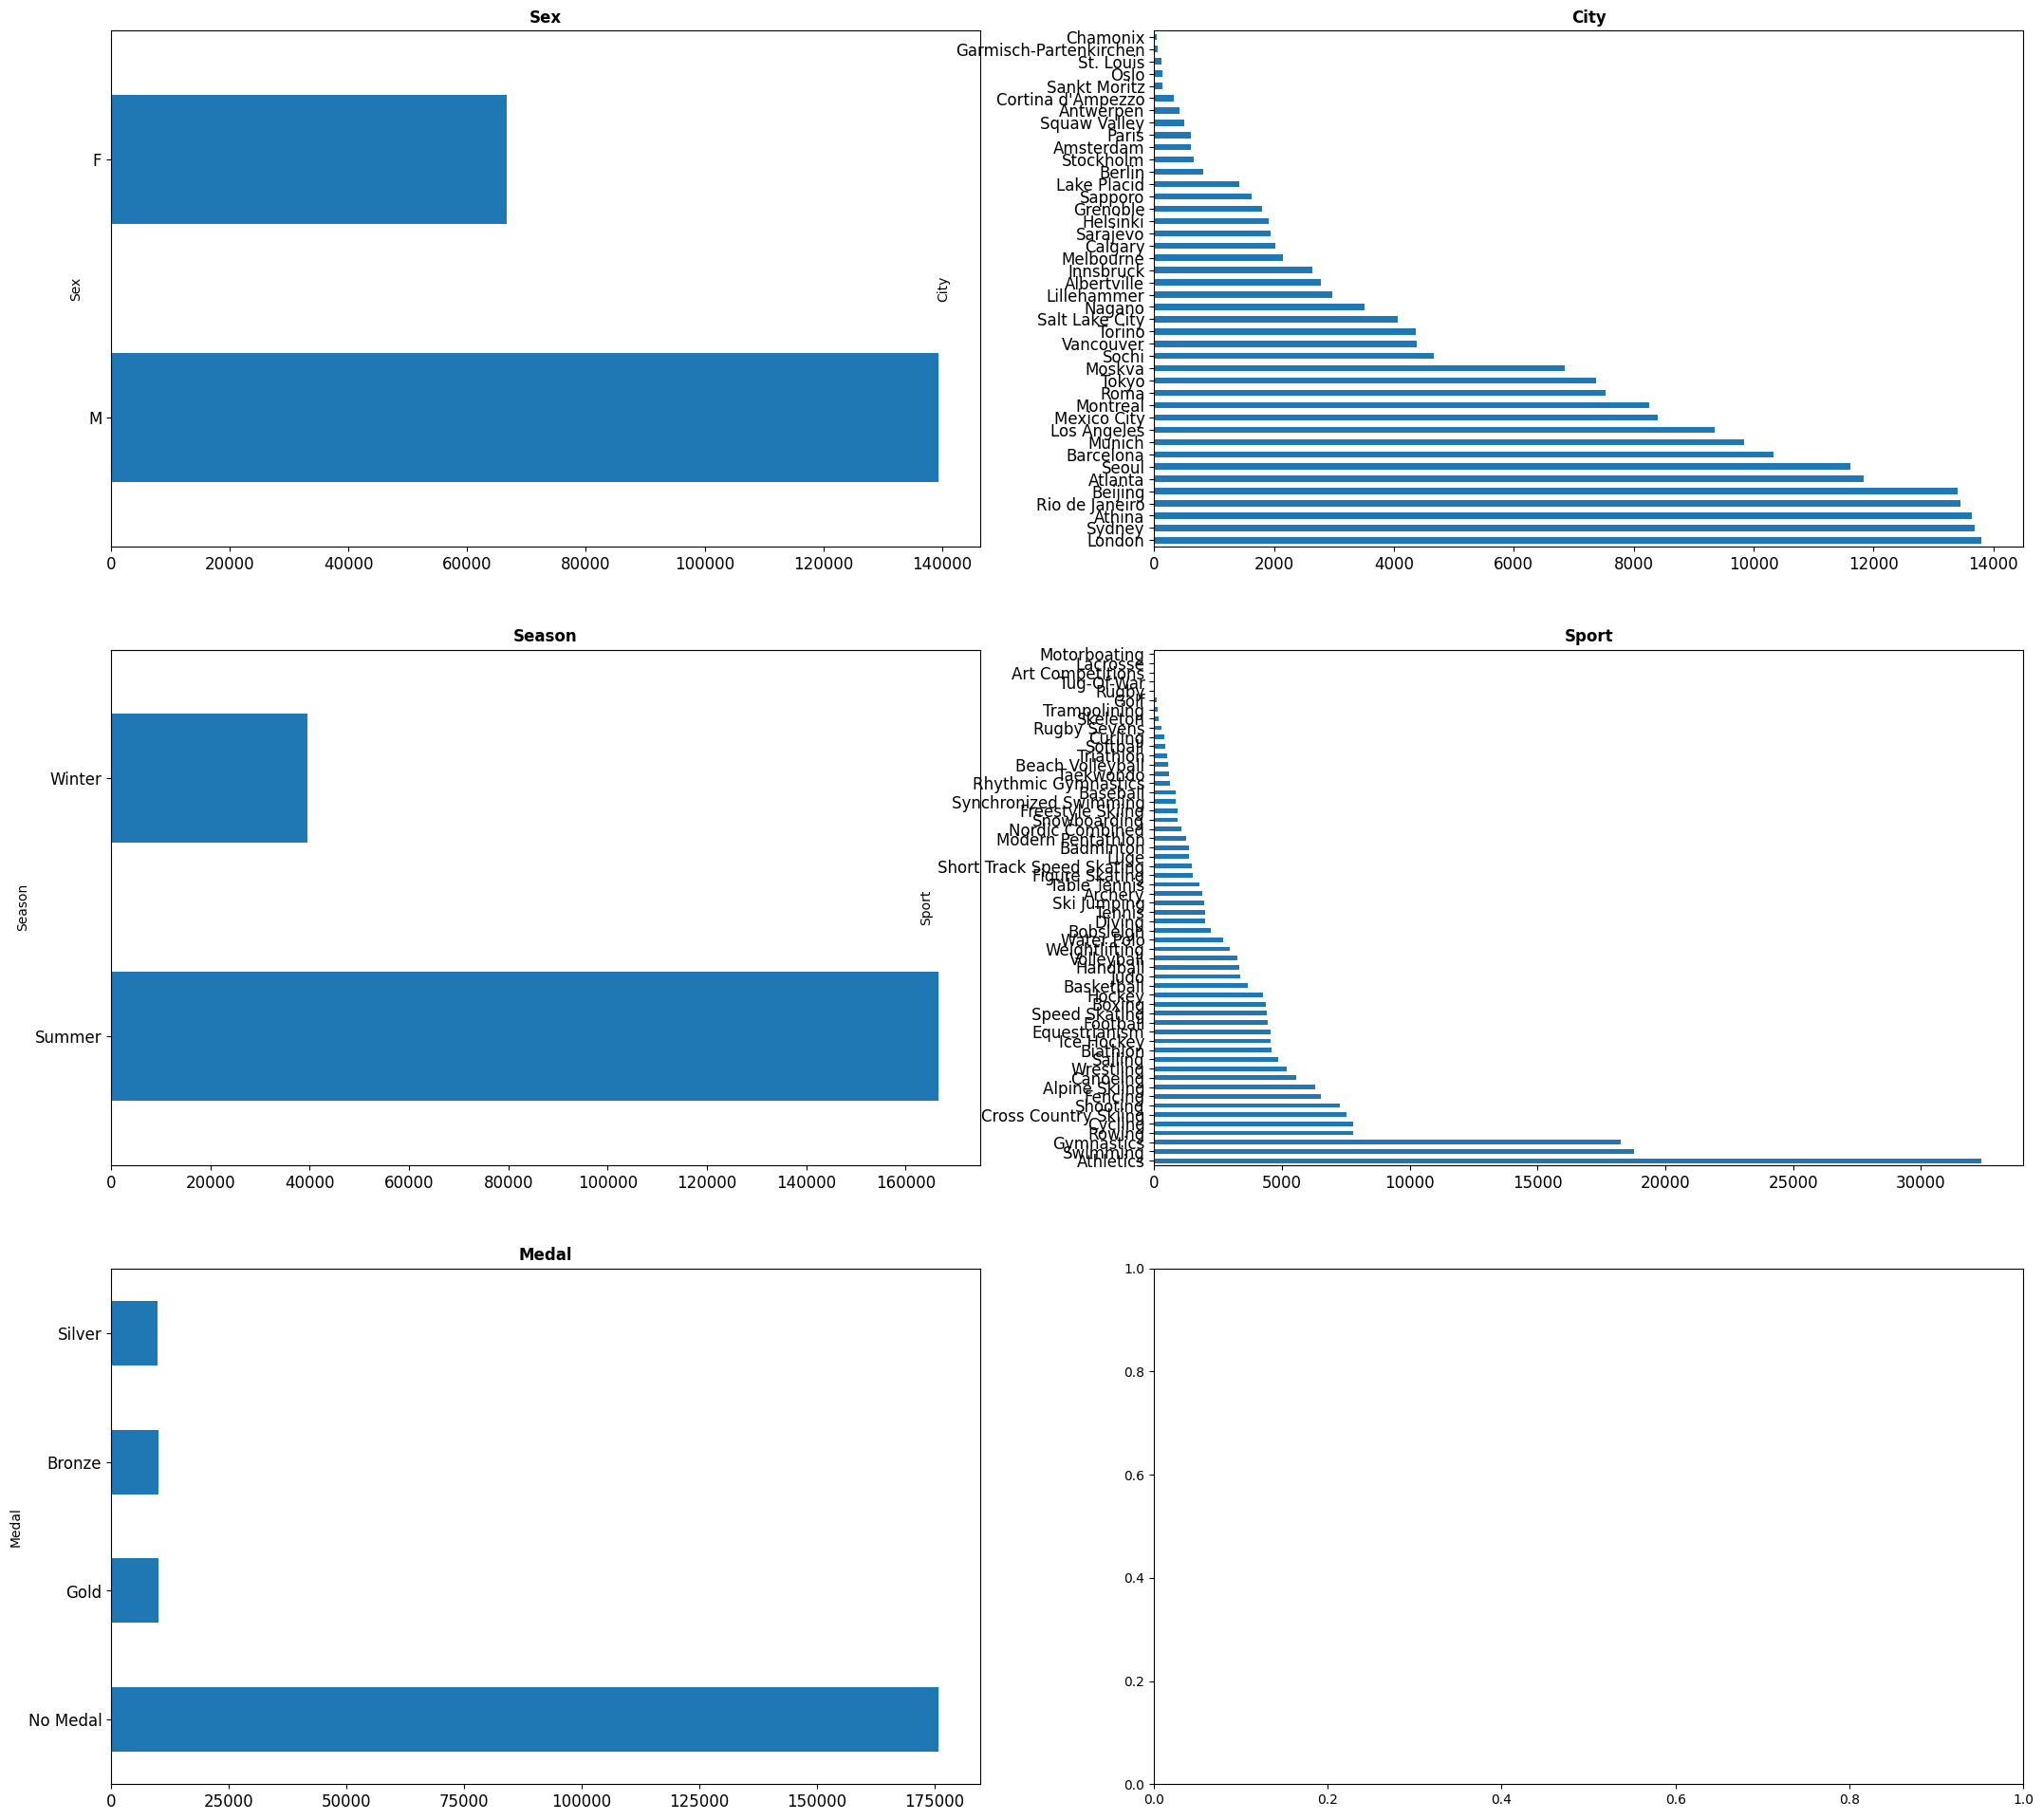

In [393]:
def graficos_eda_categoricos(cat):
    
    # Calculate the number of rows needed
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    # Define the plot
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (26, filas * 8))

    # Flatten to iterate through the plot as if it were 1-dimensional instead of 2
    ax = ax.flat 

    # Create the loop that adds plots
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
        
graficos_eda_categoricos(df.select_dtypes('O').loc[:,['Sex','City', 'Season', 'Sport', 'Medal']])


In [394]:
text_columns = df.select_dtypes('object').columns
text_columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal', 'region'],
      dtype='object')

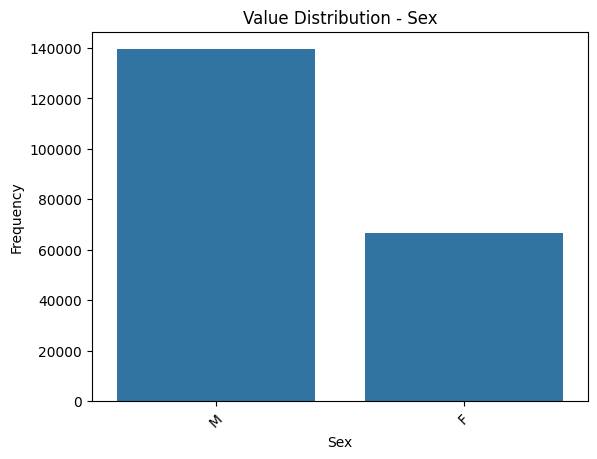

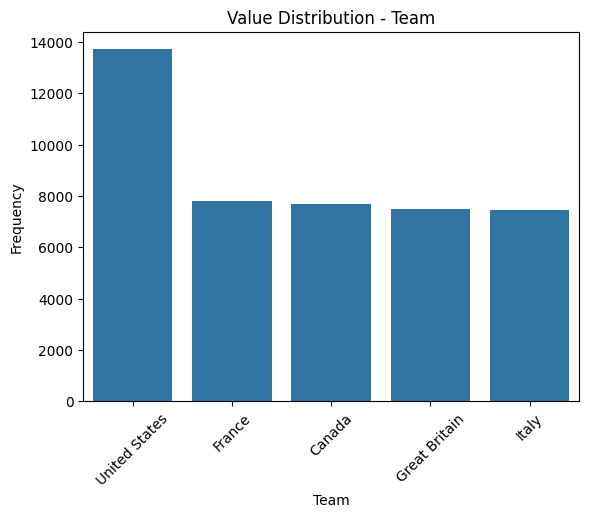

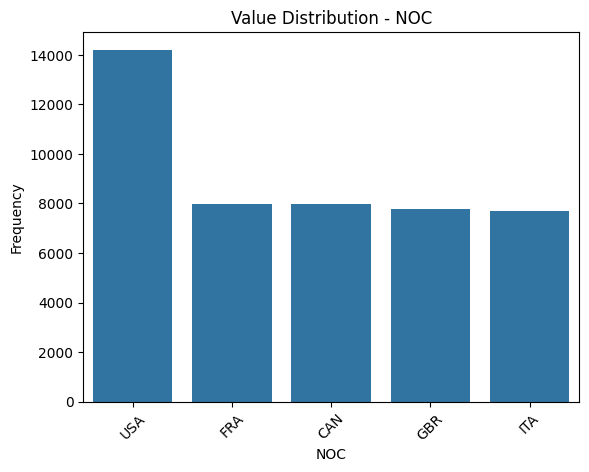

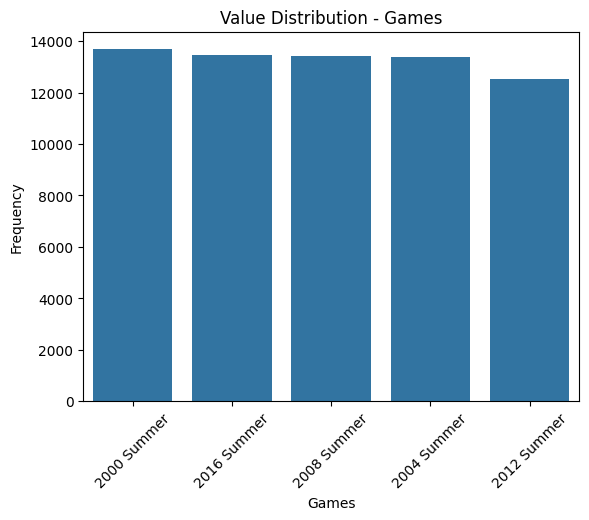

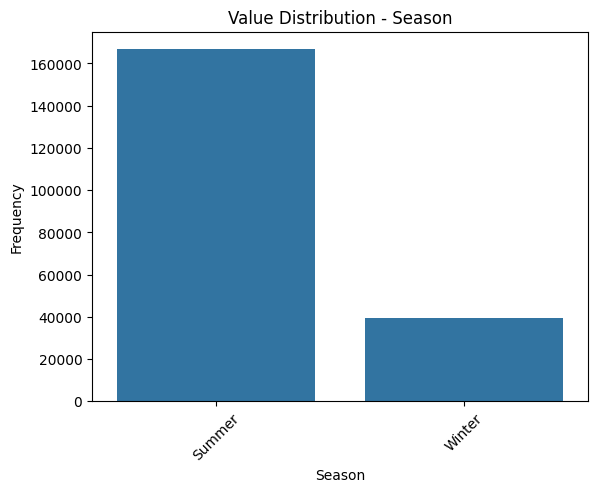

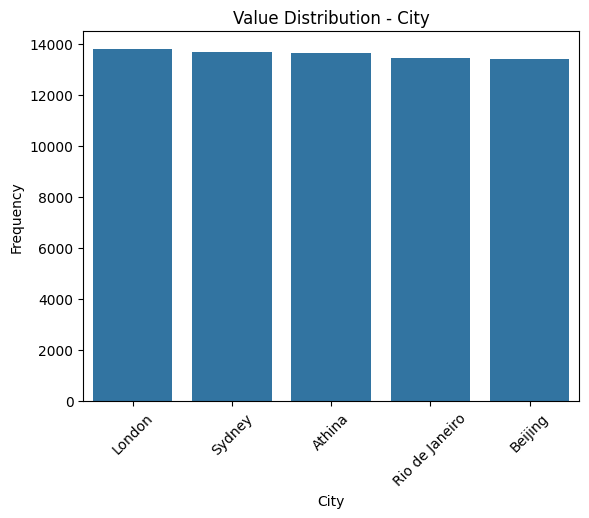

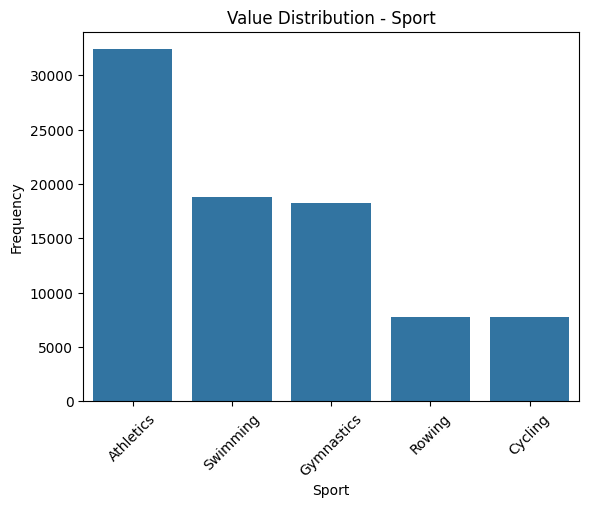

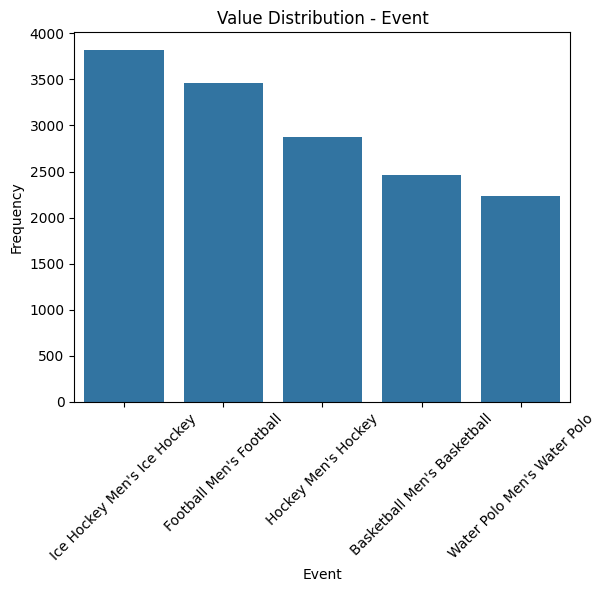

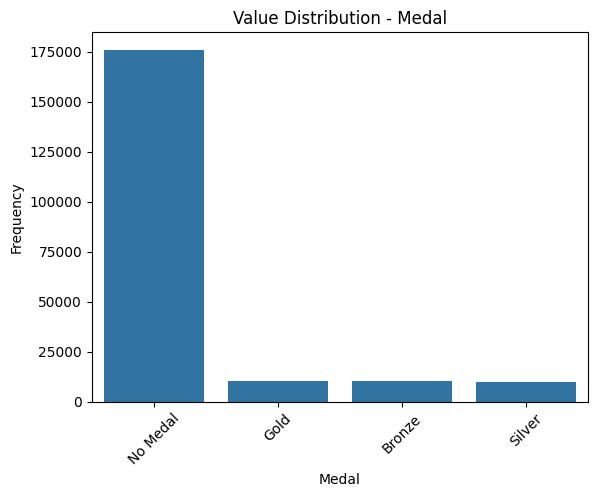

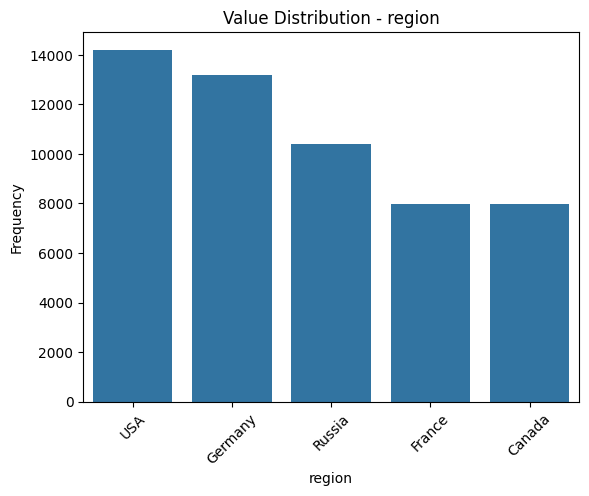

In [395]:
for column in text_columns:
  if(column != 'Name'):
    a = df[column].value_counts().head()
    sns.barplot(x=a.index, y=a.values)
    plt.title(f"Value Distribution - {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation= 45)
    plt.show()

    

In [396]:
df['region'] = df['region'].replace({'USA': 'United States'})



In [397]:
filtered_df = df[df['region'].str.len() <= 3]
print(filtered_df)

                         Name Sex   Age  Height  Weight           Team  NOC  \
888              Gary Abraham   M  17.0   175.0    64.0  Great Britain  GBR   
889              Gary Abraham   M  17.0   175.0    64.0  Great Britain  GBR   
890              Gary Abraham   M  21.0   175.0    64.0  Great Britain  GBR   
891              Gary Abraham   M  21.0   175.0    64.0  Great Britain  GBR   
892              Gary Abraham   M  21.0   175.0    64.0  Great Britain  GBR   
...                       ...  ..   ...     ...     ...            ...  ...   
267916             John Zarno   M  33.0   183.0    80.0  Great Britain  GBR   
267917             John Zarno   M  33.0   183.0    80.0  Great Britain  GBR   
268071  Kirkham "Kirk" Zavieh   M  24.0   186.0    76.0  Great Britain  GBR   
268072  Kirkham "Kirk" Zavieh   M  24.0   186.0    76.0  Great Britain  GBR   
270011         Francesca Zino   F  25.0   180.0    72.0  Great Britain  GBR   

              Games  Year  Season         City     

In [398]:
df.region.value_counts()

region
United States    14207
Germany          13183
Russia           10398
France            7975
Canada            7966
                 ...  
Brunei               9
Kosovo               8
Timor-Leste          6
Tuvalu               4
South Sudan          3
Name: count, Length: 208, dtype: int64

## Resumen general de las varibales numéricas

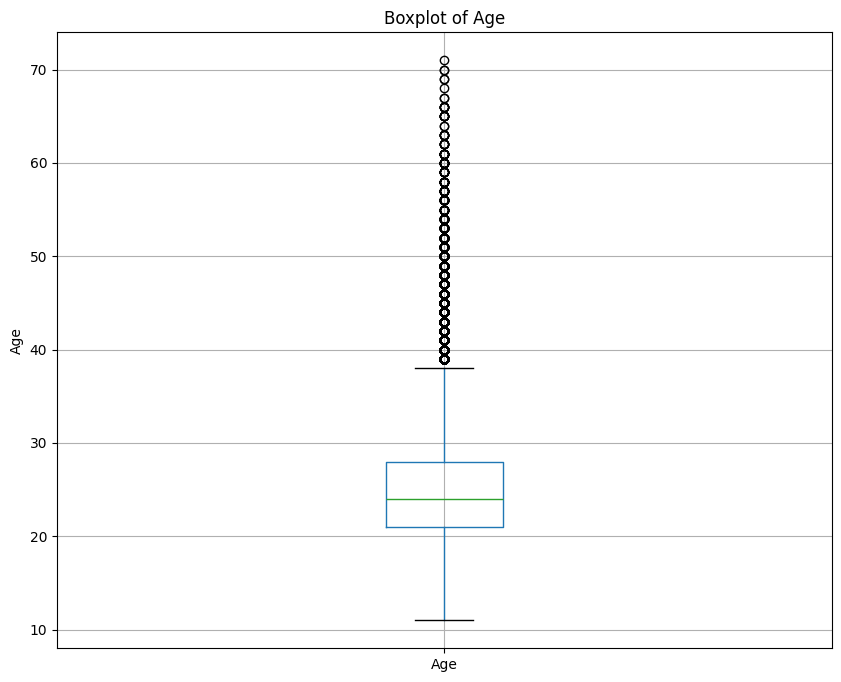

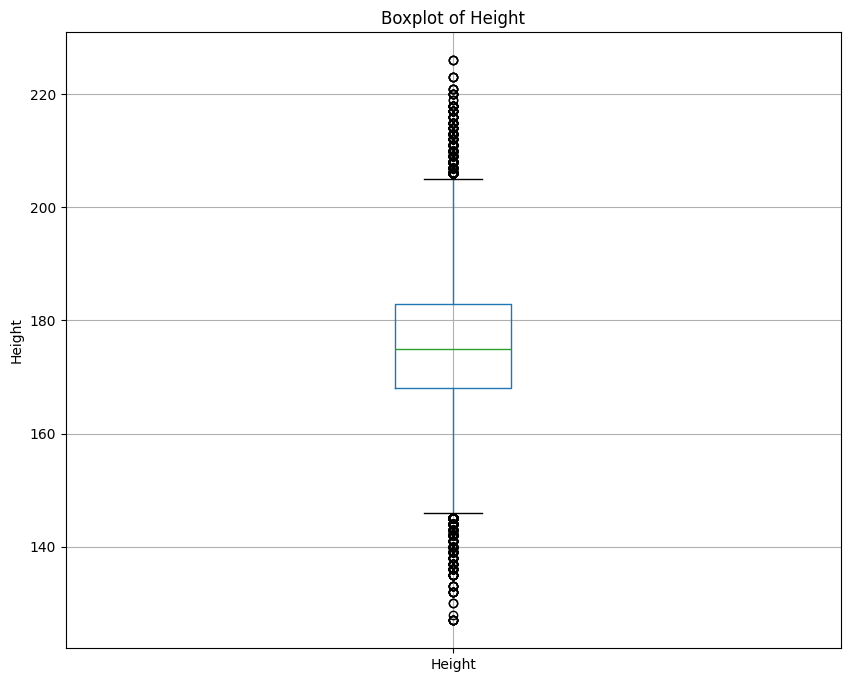

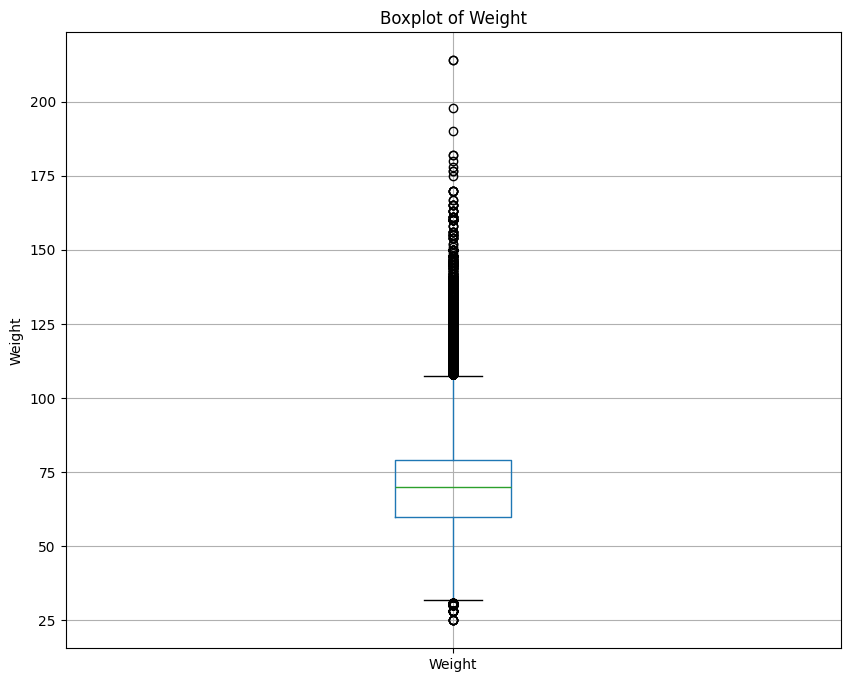

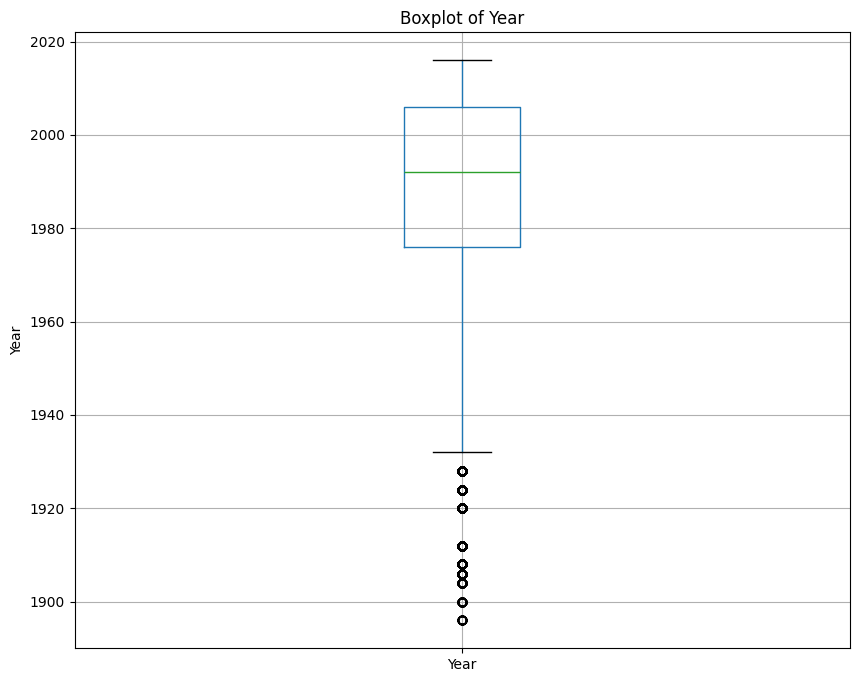

In [399]:
def graficos_boxplot(df):
    
    # Select only numeric columns
    df_numerico = df.select_dtypes('number')
    
    # Iterate over each numeric column
    for columna in df_numerico.columns:
        plt.figure(figsize=(10, 8))
        df.boxplot(column=columna)
        plt.title(f'Boxplot of {columna}')
        plt.ylabel(columna)
        plt.show()
        

graficos_boxplot(df)


## Analysis of Possible Outliers


### Analysis of Age



In [400]:
rango_iqr = stats.iqr(df['Age'])
rango_iqr = stats.iqr(df['Age'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Age"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Age"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 7.0
The lower bound is 10.5
The upper bound is 38.5


In [401]:
df[df.Age < 13].Age.value_counts()

Age
12.0    27
11.0     6
Name: count, dtype: int64

### Analysis of Height


In [402]:
rango_iqr = stats.iqr(df['Height'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Height"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Height"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 15.0
The lower bound is 145.5
The upper bound is 205.5


In [403]:
df[df.Height < 155].Height.value_counts()

Height
152.0    820
154.0    680
150.0    674
153.0    671
151.0    233
147.0    207
148.0    200
149.0    187
145.0    161
146.0    153
142.0    109
144.0     99
143.0     77
140.0     56
139.0     48
136.0     28
141.0     25
138.0     20
137.0     18
135.0     14
127.0      7
132.0      7
133.0      6
130.0      2
128.0      1
Name: count, dtype: int64

In [404]:
df[df.Height == 128]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
180615,Helman Palije,M,21.0,128.0,74.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Middleweight,No Medal,Malawi


In [405]:
rango_iqr = stats.iqr(df['Weight'])

print(f"The interquartile range is: {rango_iqr}")
print(f'The lower bound is {np.quantile(df["Weight"], 0.25) - rango_iqr * 1.5}')
print(f'The upper bound is {np.quantile(df["Weight"], 0.75) + rango_iqr * 1.5}')


The interquartile range is: 19.0
The lower bound is 31.5
The upper bound is 107.5


In [406]:
df[df.Weight > 93].Weight.value_counts().sort_index(ascending=False)

Weight
214.0       2
198.0       1
190.0       1
182.0       2
180.0       1
         ... 
96.5        3
96.0      854
95.0     1819
94.0      979
93.5        4
Name: count, Length: 107, dtype: int64

In [407]:
df[df.Weight > 93].count()

Name      12393
Sex       12393
Age       12393
Height    12393
Weight    12393
Team      12393
NOC       12393
Games     12393
Year      12393
Season    12393
City      12393
Sport     12393
Event     12393
Medal     12393
region    12393
dtype: int64

# Insights

## What is the distribution of medals by country?


In [408]:
country_medal = df.groupby(['region', 'Medal']).size().unstack().fillna(0)
country_medal['total'] = country_medal.sum(axis=1)
country_medal_top20 = country_medal.sort_values(by='total',ascending=False).drop('No Medal', axis=1).head(10)
country_medal_top20


Medal,Bronze,Gold,Silver,total
region,,,,
United States,982.0,2115.0,1286.0,14207.0
Germany,1072.0,1102.0,1015.0,13183.0
Russia,1083.0,1465.0,1062.0,10398.0
France,375.0,285.0,327.0,7975.0
Canada,355.0,362.0,343.0,7966.0
UK,351.0,330.0,350.0,7765.0
Italy,387.0,315.0,358.0,7697.0
Japan,345.0,226.0,272.0,7487.0
Australia,477.0,319.0,414.0,6630.0


           region   Medal   Count
0   United States    Gold  2115.0
1         Germany    Gold  1102.0
2          Russia    Gold  1465.0
3          France    Gold   285.0
4          Canada    Gold   362.0
5              UK    Gold   330.0
6           Italy    Gold   315.0
7           Japan    Gold   226.0
8       Australia    Gold   319.0
9          Poland    Gold   114.0
10  United States  Silver  1286.0
11        Germany  Silver  1015.0
12         Russia  Silver  1062.0
13         France  Silver   327.0
14         Canada  Silver   343.0
15             UK  Silver   350.0
16          Italy  Silver   358.0
17          Japan  Silver   272.0
18      Australia  Silver   414.0
19         Poland  Silver   190.0
20  United States  Bronze   982.0
21        Germany  Bronze  1072.0
22         Russia  Bronze  1083.0
23         France  Bronze   375.0
24         Canada  Bronze   355.0
25             UK  Bronze   351.0
26          Italy  Bronze   387.0
27          Japan  Bronze   345.0
28      Austra

Text(0.5, 1.0, 'Medals by Country')

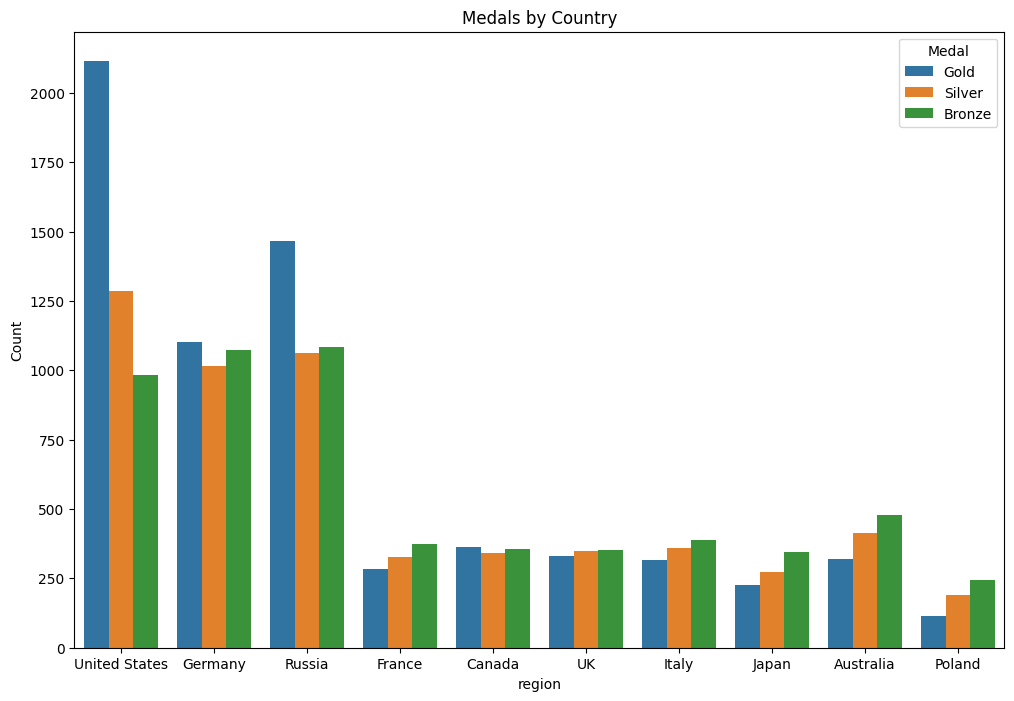

In [409]:
country_medal_reset = country_medal_top20.reset_index()
medals_melted = country_medal_reset.melt(id_vars='region', value_vars=['Gold', 'Silver', 'Bronze'], var_name='Medal', value_name='Count')

print(medals_melted)

plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='Count', hue='Medal', data=medals_melted)
plt.title("Medals by Country")


### Observations

- **The United States** is the country with the highest number of medals across all categories (gold, silver, and bronze), solidifying its position as the top Olympic power.

- **The Soviet Union** (considering historical data) remains one of the most successful countries in Olympic history, especially in gold medals.

- **Germany** ranks third in gold medals and shows consistent performance across all categories, highlighting its strong presence in the Olympics.

- **Great Britain**, **France**, and **Italy** are other European countries that stand out, each with a significant number of medals in all categories, reflecting their rich Olympic traditions.

- **Australia** and **Canada** show solid performances, especially in bronze and silver medals, underscoring their focus on high-performance sports.

- **Hungary** stands out as a smaller country compared to others on the list but with a notable number of medals, demonstrating its effectiveness in specific sports.

The bar chart visually illustrates these conclusions, allowing for a clear comparison between different countries and types of medals.

## How has the participation of women in the Olympic Games evolved over the years?

We create dataframes for men and women and perform data segmentation, as well as the segmentation of Winter and Summer Olympic Games.


Text(0.5, 1.0, 'Female participation')

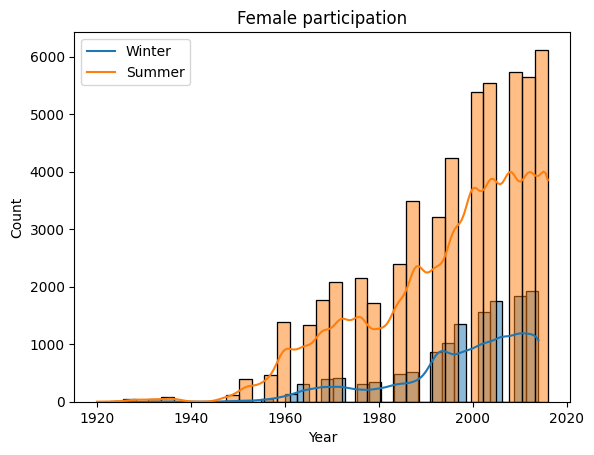

In [410]:
females = df[df.Sex == 'F']
males = df[df.Sex == 'M']

females_winter = females[females.Season == 'Winter']
males_winter = males[males.Season == 'Winter']

females_summer = females[females.Season == 'Summer']
males_summer = males[males.Season == 'Summer']

female_participation_winter = females_winter.groupby('Year').size().reset_index().rename(columns={0: 'count'})
female_participation_summer = females_summer.groupby('Year').size().reset_index().rename(columns={0: 'count'})

sns.histplot(data=females_winter, x='Year', bins=35, kde=True) 
sns.histplot(data=females_summer, x='Year', bins=35, kde=True) 
plt.legend(['Winter', 'Summer'])
plt.title('Female participation')

### Observations:
- **Summer Olympics Participation**: Female participation in the Summer Olympics has steadily increased, especially since the mid-20th century.

- **Winter Olympics Participation**: Female participation in the Winter Olympics has also grown, though the increase is less pronounced compared to the Summer Games.

### Conclusions:

- **Overall Increase**: There has been a significant rise in female participation in both the Summer and Winter Olympics over time.

- **Seasonal Difference**: The Summer Olympics consistently have higher female participation than the Winter Olympics.

- **Historical Impact**: The inclusion of more female events and the overall expansion of the Olympics have driven this growth.


## What is the relationship between height and weight of athletes by their sport?

We show the relationship between height and weight for the 3 most common sports in the Olympics.


### Women

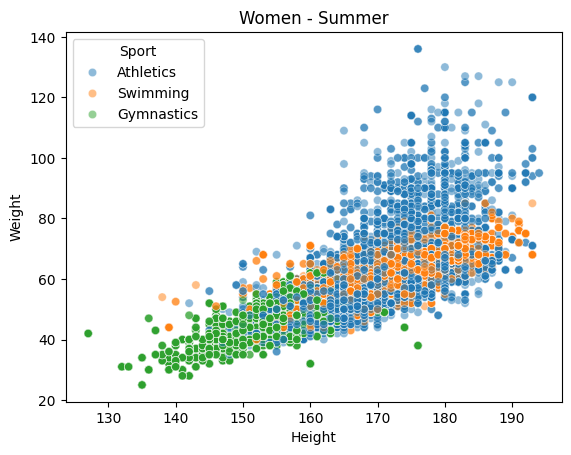

Text(0.5, 1.0, 'Women - Winter')

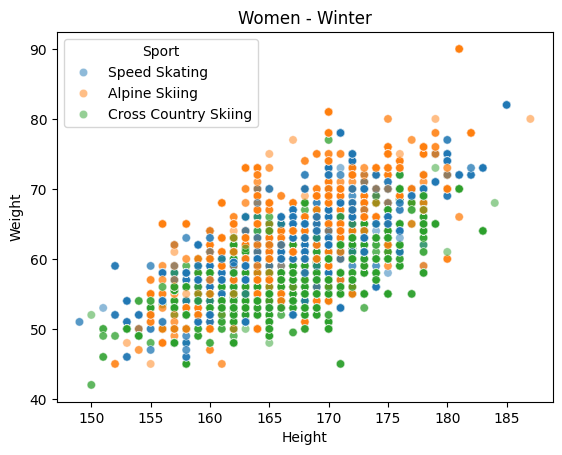

In [411]:
female_summer_sports = females_summer.Sport.value_counts().head(3).index.to_list()
female_winter_sports = females_winter.Sport.value_counts().head(3).index.to_list()

female_summer_top_3_sports_dataframe = females_summer[females_summer.Sport.isin(female_summer_sports)]
female_winter_top_3_sports_dataframe = females_winter[females_winter.Sport.isin(female_winter_sports)]

# Create the visualization
sns.scatterplot(data=female_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Women - Summer')
plt.show()
sns.scatterplot(data=female_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Women - Winter')


### Observations:
- **Summer Sports**: The scatter plot for the top 3 most common women's sports in the Summer Olympics shows the distribution of height and weight among athletes. Each sport tends to have athletes with different physical profiles, highlighting the diversity in body types required for different sports.
  
- **Winter Sports**: Similarly, the scatter plot for Winter Olympics sports shows distinct clusters for each sport, indicating that different sports demand specific physical attributes.

### Conclusions:
- **Sport-Specific Physical Profiles**: Both in Summer and Winter Olympics, the top sports have athletes with varied physical characteristics, tailored to the demands of their respective sports.

- **Diversity in Athletics**: The variation in height and weight across sports underscores the diverse nature of athletic requirements in the Olympics, where each sport attracts athletes with unique physical builds.


### Hombres

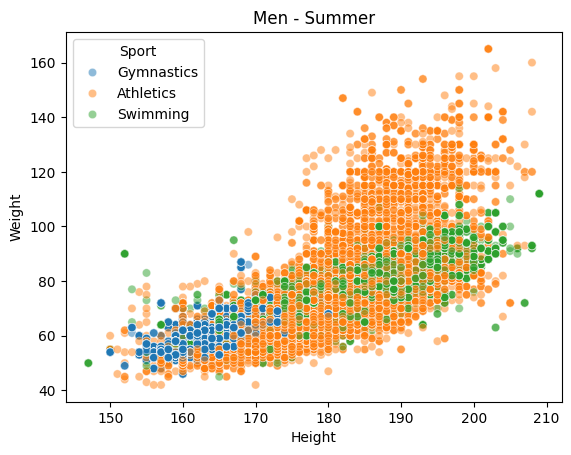

Text(0.5, 1.0, 'Men - Winter')

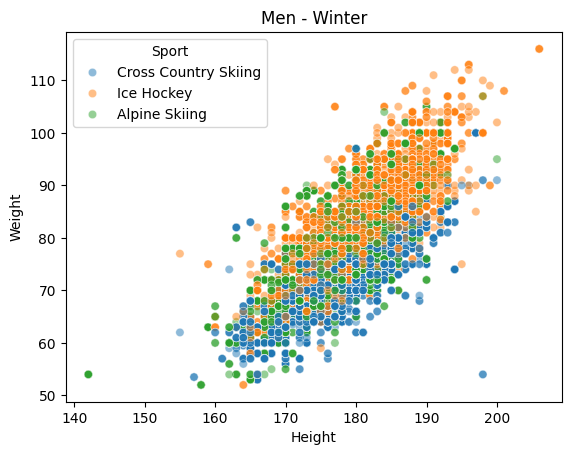

In [412]:
male_summer_sports = males_summer.Sport.value_counts().head(3).index.to_list()
male_winter_sports = males_winter.Sport.value_counts().head(3).index.to_list()

male_summer_top_3_sports_dataframe = males_summer[males_summer.Sport.isin(male_summer_sports)]
male_winter_top_3_sports_dataframe = males_winter[males_winter.Sport.isin(male_winter_sports)]

sns.scatterplot(data=male_summer_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Men - Summer')
plt.show()
sns.scatterplot(data=male_winter_top_3_sports_dataframe, x='Height', y='Weight', hue='Sport', alpha=0.5)
plt.title('Men - Winter')


### Observations:
- **Summer Sports**: The scatter plot for the top 3 most common men's sports in the Summer Olympics shows distinct clusters of height and weight for different sports, indicating the varied physical demands of each sport.
  
- **Winter Sports**: Similarly, the scatter plot for Winter Olympics sports shows clear groupings by sport, with each sport having athletes with specific physical profiles.

### Conclusions:
- **Sport-Specific Physical Profiles**: Just like in women's sports, men's sports also require specific physical attributes, with notable differences between the top sports in both the Summer and Winter Olympics.

- **Diversity in Physical Requirements**: The variation in height and weight across the top sports highlights the diversity of physical builds necessary for success in different Olympic events.


## Variation in the Age of Medalists Across Different Sports and Events, Segmented by Gender and Season

We show the relationship of individuals who have won medals in the 10 sports with the most participants.


Sport
Athletics               32374
Swimming                18776
Gymnastics              18271
Rowing                   7790
Cycling                  7774
Cross Country Skiing     7529
Shooting                 7260
Fencing                  6537
Alpine Skiing            6322
Canoeing                 5550
Name: count, dtype: int64


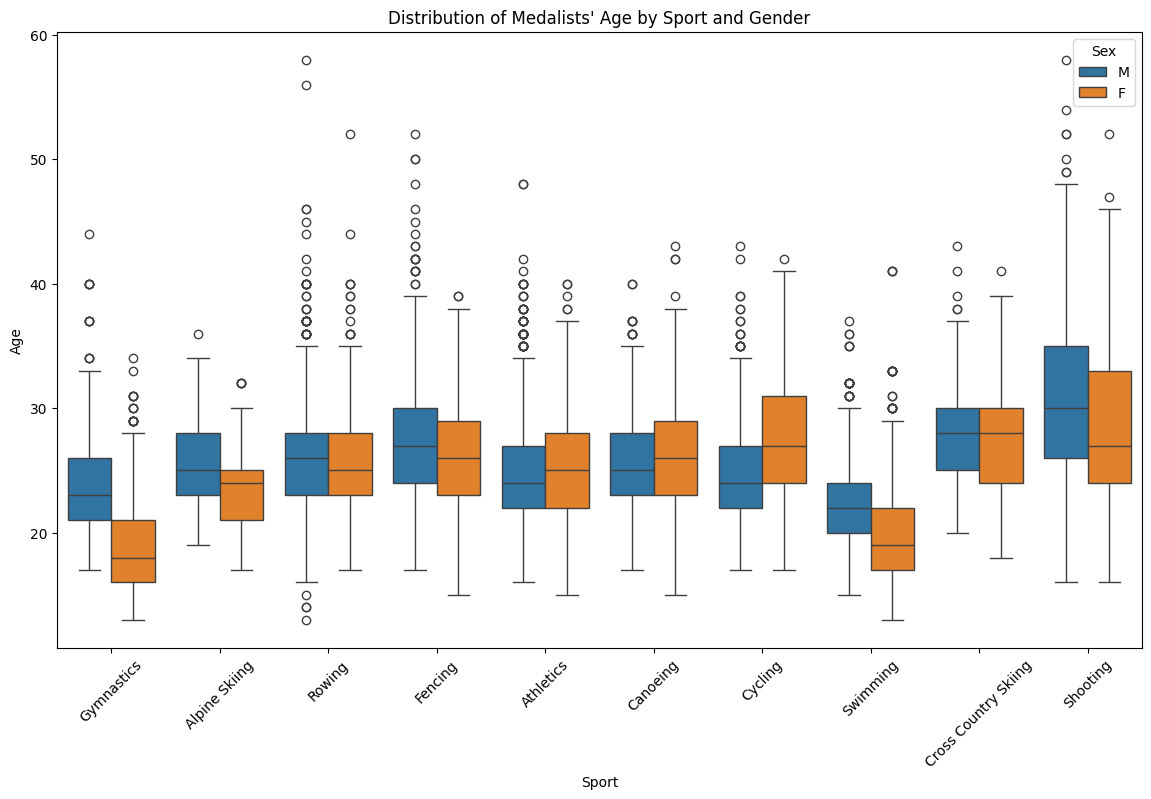

In [413]:
top_ten_sports = df.Sport.value_counts().sort_values(ascending=False).head(10).index.to_list()
print(df.Sport.value_counts().sort_values(ascending=False).head(10))

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[(df.Sport.isin(top_ten_sports)) & (df.Medal != 'No Medal')], x='Sport', y='Age', hue='Sex')
plt.title("Distribution of Medalists' Age by Sport and Gender")
plt.xlabel("Sport")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


### Results:
The top 10 most common sports in the dataset are:

1. **Athletics**: 38,624 entries
2. **Gymnastics**: 26,707 entries
3. **Swimming**: 23,195 entries
4. **Shooting**: 11,448 entries
5. **Cycling**: 10,859 entries
6. **Fencing**: 10,735 entries
7. **Rowing**: 10,595 entries
8. **Cross Country Skiing**: 9,133 entries
9. **Alpine Skiing**: 8,829 entries
10. **Wrestling**: 7,154 entries

### Conclusions:
- **Age Distribution by Sport and Gender**: The boxplot shows the distribution of ages among medalists across the top 10 sports, divided by gender. There are noticeable differences in the median age depending on the sport, with some sports favoring younger athletes (e.g., Gymnastics) and others showing a broader age range (e.g., Shooting, Fencing).

- **Gender Differences**: The plot also reveals gender-based differences in the age distribution within the same sport, suggesting that the peak performance age might vary between men and women in these sports.


## Emerging Countries in Recent Olympic Games in Terms of Medals Won, Segmented by Season


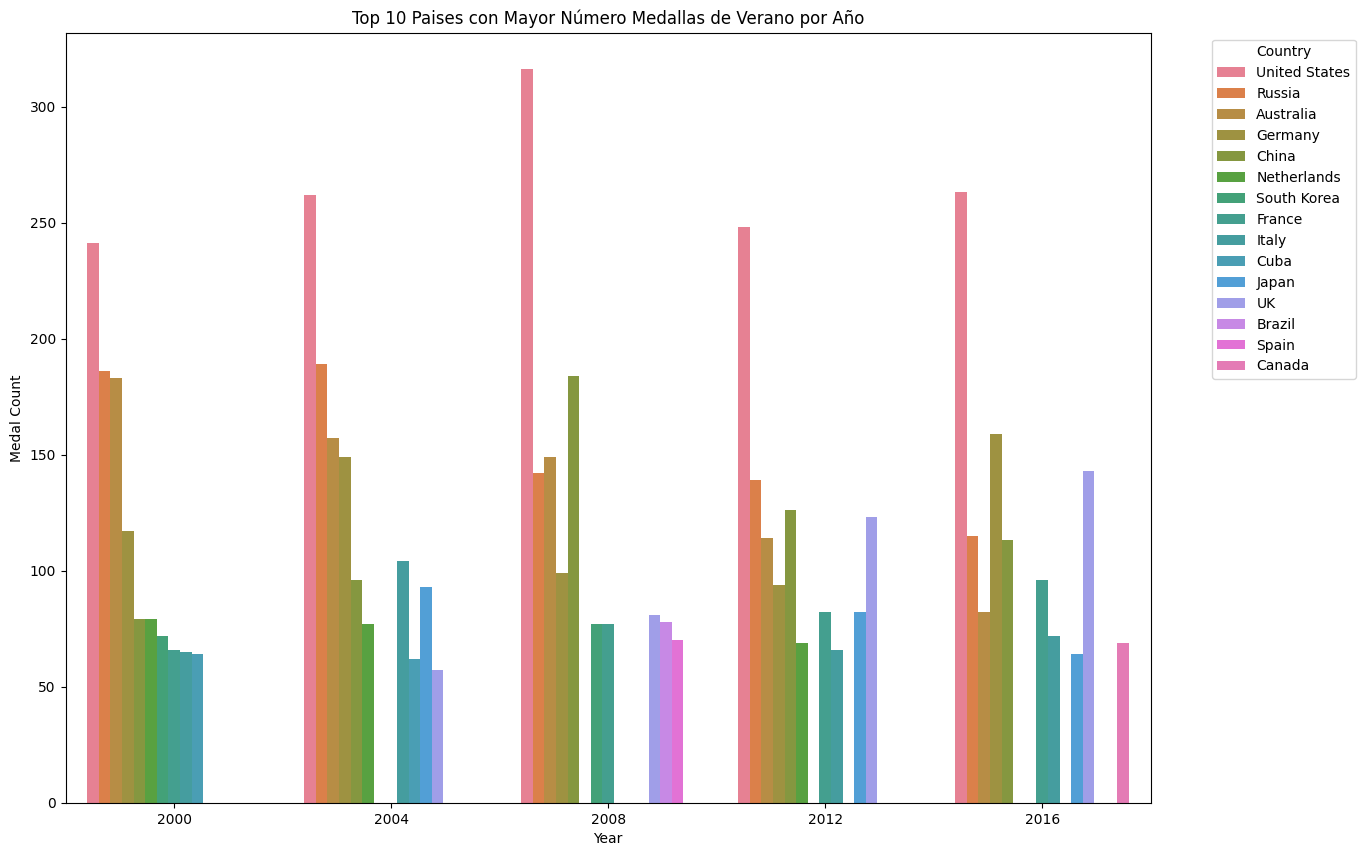

In [414]:
recent_games_summer = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Summer')]

medals_by_country_recent_summer_season = recent_games_summer.groupby(['Year', 'region']).size().reset_index(name='Medal Count')
medals_by_country_recent_summer_season = medals_by_country_recent_summer_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_summer = medals_by_country_recent_summer_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='region', data=top_10_countries_by_year_summer, dodge=True)
plt.title('Top 10 Paises con Mayor Número Medallas de Verano por Año')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



### Conclusions:

- **Consistent Dominance**: Certain countries, such as the United States and China, frequently appear among the top 10, indicating their consistent dominance in the Summer Olympics.

- **Yearly Variation**: The number of medals won by each country can vary significantly from year to year, reflecting changes in athletic performance, investment in sports, and other factors.

- **Diverse Representation**: While some countries are consistently at the top, the top 10 list for each year also shows diversity, with different nations making significant impacts in different Olympic years.


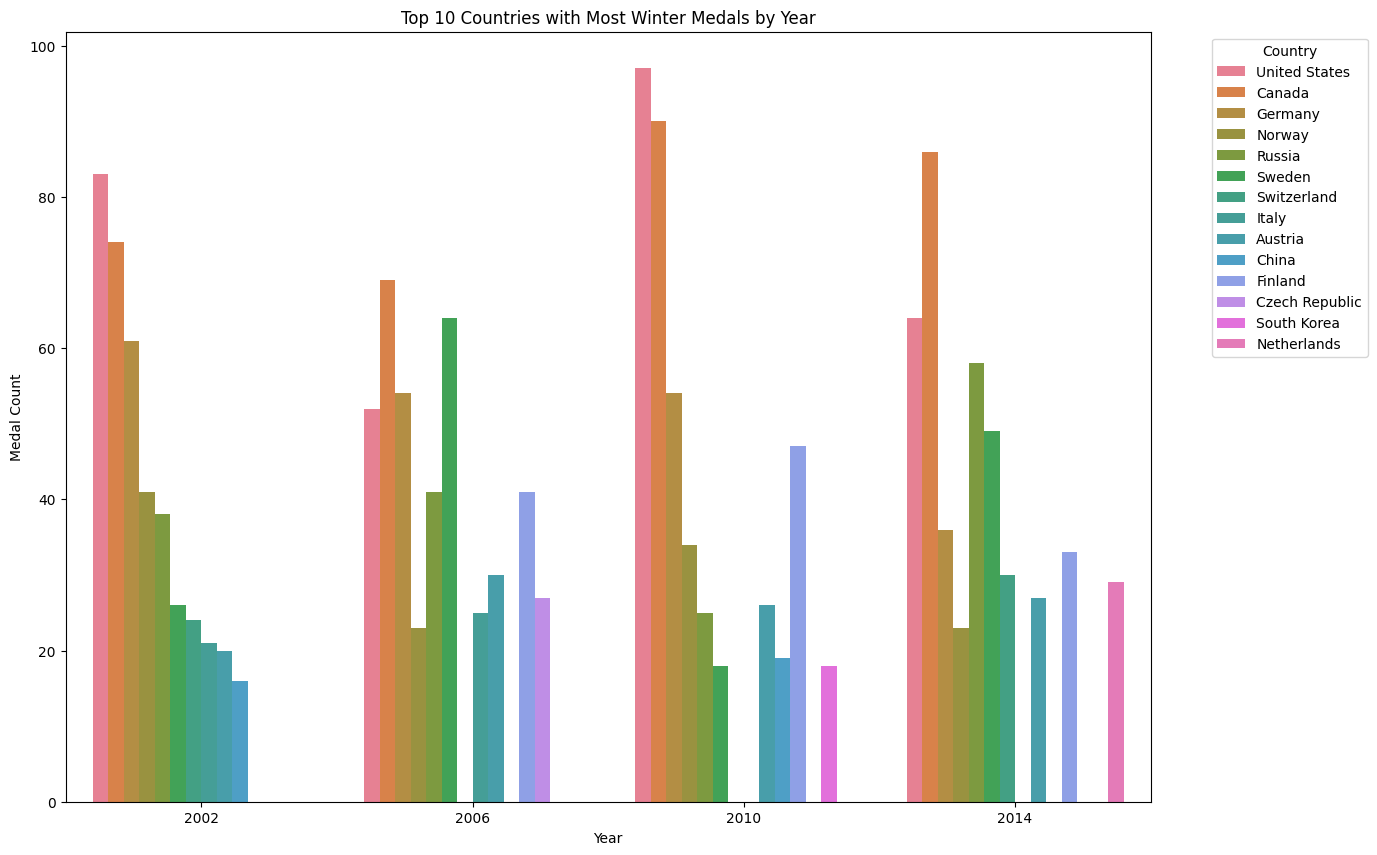

In [415]:
recent_games_winter = df[(df['Year'] >= 2000) & (df['Medal'] != 'No Medal') & (df['Season'] == 'Winter')]

medals_by_country_recent_winter_season = recent_games_winter.groupby(['Year', 'region']).size().reset_index(name='Medal Count')
medals_by_country_recent_winter_season = medals_by_country_recent_winter_season.sort_values(by=['Year', 'Medal Count'], ascending=[True, False])

top_10_countries_by_year_winter = medals_by_country_recent_winter_season.groupby('Year').head(10).reset_index(drop=True)

plt.figure(figsize=(14, 10))
sns.barplot(x='Year', y='Medal Count', hue='region', data=top_10_countries_by_year_winter, dodge=True)
plt.title('Top 10 Countries with Most Winter Medals by Year')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Conclusions:
- **Consistent Leaders**: Certain countries, such as Norway, Germany, and the United States, frequently rank among the top 10, demonstrating their strong performances in Winter Olympic sports.

- **Yearly Shifts**: The chart reveals fluctuations in medal counts across different years, suggesting changes in the competitive landscape of Winter sports.

- **Regional Dominance**: European countries are prominently featured, indicating their dominance in Winter Olympic events, which is likely due to their climate and investment in Winter sports infrastructure.

## Success Rate of Athletes Based on the Number of Olympic Games They Have Participated In, Segmented by Gender


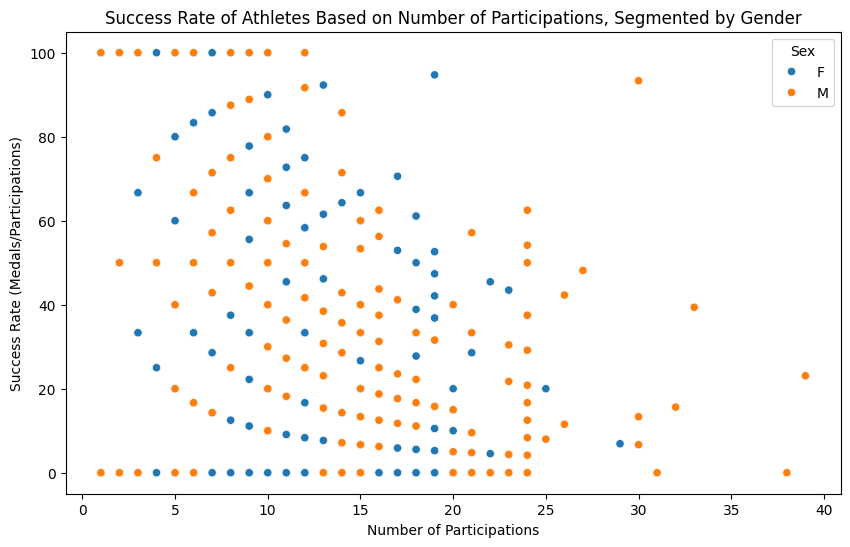

In [416]:
# Filter medal data
df['Medal_count'] = df['Medal'].apply(lambda x: 1 if x in ['Gold', 'Silver', 'Bronze'] else 0)

participations_medals_sex = df.groupby(['Name', 'Sex']).agg({
    'Name': 'count',
    'Medal_count': 'sum'
}).rename(columns={'Name': 'Participations', 'Medal_count': 'Medals'}).reset_index()

participations_medals_sex['Success Rate'] = (participations_medals_sex['Medals'] / participations_medals_sex['Participations']) * 100

plt.figure(figsize=(10, 6))
sns.scatterplot(data=participations_medals_sex, x='Participations', y='Success Rate', hue='Sex')
plt.title("Success Rate of Athletes Based on Number of Participations, Segmented by Gender")
plt.xlabel("Number of Participations")
plt.ylabel("Success Rate (Medals/Participations)")
plt.show()


### Conclusions:
- **Higher Success with Fewer Participations**: Athletes with fewer participations often have a higher success rate, suggesting that elite athletes tend to perform well in their first few Olympic appearances.

- **Gender Comparison**: The plot shows some variation between male and female athletes in terms of success rates, but overall, both genders exhibit a similar pattern where the success rate decreases as the number of participations increases.

- **Elite Performance**: A small number of athletes maintain a high success rate even with multiple participations, indicating consistent elite performance across several Olympic Games.

## Change in the Distribution of Sports in the Olympic Games Over Time, Segmented by Season



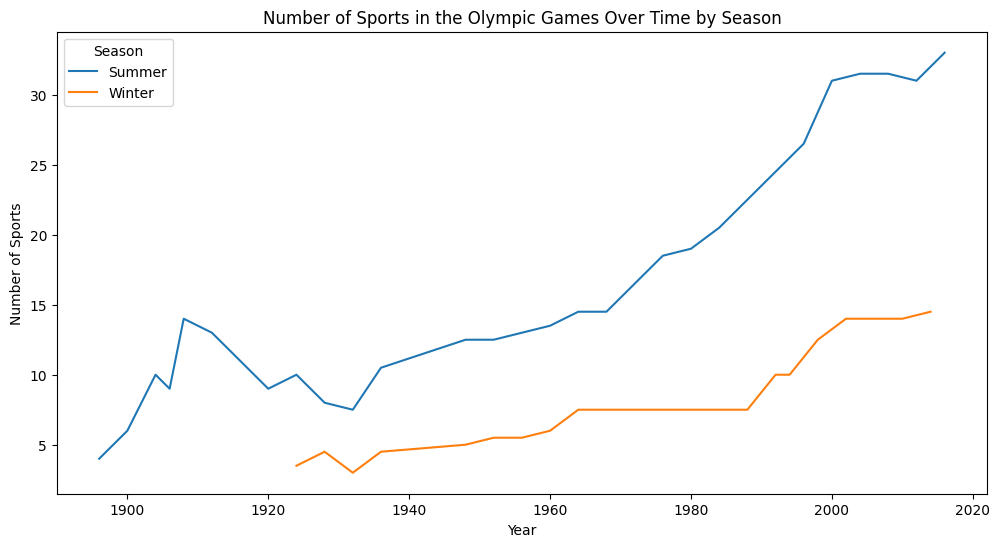

In [417]:
# Count the number of sports by year and season
sports_by_year_season = df.groupby(['Year', 'Sex', 'Season'])['Sport'].nunique().reset_index(name='Unique Sports')

plt.figure(figsize=(12, 6))
sns.lineplot(data=sports_by_year_season, x='Year', y='Unique Sports', errorbar=None, hue='Season')

plt.title("Number of Sports in the Olympic Games Over Time by Season")
plt.xlabel("Year")
plt.ylabel("Number of Sports")
plt.show()




### Conclusions:
- **Growth in Sports**: Both the Summer and Winter Olympics have seen an increase in the number of sports over time, reflecting the expansion and diversification of the Games.

- **Seasonal Differences**: The Summer Olympics consistently feature a larger number of sports compared to the Winter Olympics, which is likely due to the broader range of summer sports and events.

- **Recent Trends**: In recent years, the number of sports in both seasons has stabilized, indicating a mature phase of the Olympic Games' evolution.

## Significant Differences in the Number of Medals Won Between Male and Female Athletes, Segmented by Season


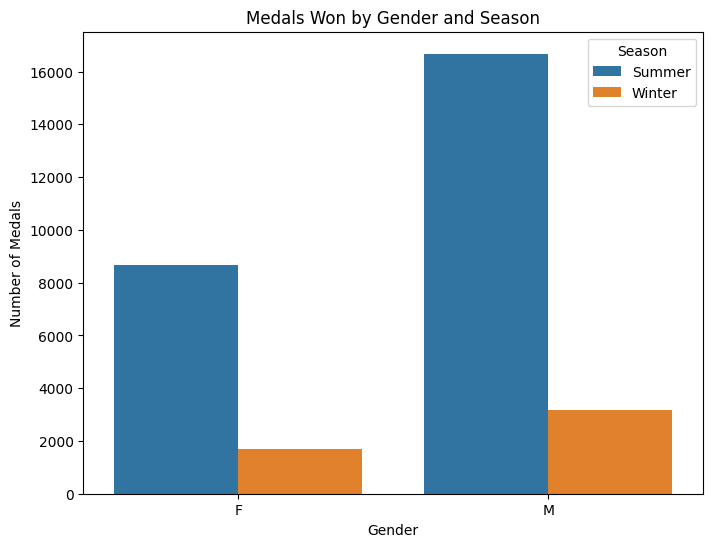

In [418]:
medal_segmented = df[df['Medal'] != 'No Medal']

medals_by_sex_season = medal_segmented.groupby(['Sex', 'Season']).size().reset_index(name='Medal Count')

plt.figure(figsize=(8, 6))
sns.barplot(data=medals_by_sex_season, x='Sex', y='Medal Count', hue='Season')
plt.title("Medals Won by Gender and Season")
plt.xlabel("Gender")
plt.ylabel("Number of Medals")
plt.show()


### Conclusions:
- **Gender Participation**: The chart shows a higher overall number of medals won by male athletes compared to female athletes, reflecting historical trends in participation and opportunities in the Olympic Games.

- **Seasonal Variation**: In both genders, more medals are won in the Summer Olympics than in the Winter Olympics, likely due to the larger number of events and sports in the Summer Games.

In [419]:
cleaned_dataset = df.to_excel('cleaned_dataset.xlsx', index=False)